# Content Based recommenders

### Load the data

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
recsys_path = "/content/gdrive/MyDrive/recsys/"
data_path = recsys_path + 'data/'
data_train_path = data_path + "data_train.csv"

In [4]:
import os
import pandas as pd

# create folders and load data from github
if not os.path.exists(data_path):
    os.makedirs(data_path)
    os.chdir(recsys_path)
    !git clone https://github.com/fulcus/recommender-systems-challenge.git
    !mv recommender-systems-challenge/data data
    !rm -rf recommender-systems-challenge

# clone course repository
nb_folder = recsys_path + 'notebooks/'
lib_folder = nb_folder + 'RecSys_Course_AT_PoliMi/'
if not os.path.exists(lib_folder):
    if not os.path.exists(nb_folder):
        os.makedirs(nb_folder)
    os.chdir(nb_folder)
    !git clone https://github.com/MaurizioFD/RecSys_Course_AT_PoliMi.git
  
#os.chdir(recsys_path)
os.chdir(lib_folder)

In [5]:
!pwd 

/content/gdrive/.shortcut-targets-by-id/1F99a6Mxk92tXCvA98E76ZU8_XrJXqC4L/recsys/notebooks/RecSys_Course_AT_PoliMi


In [6]:
URM_all_dataframe = pd.read_csv(data_train_path,
                                dtype={0:int, 1:int, 2:int})
URM_all_dataframe.columns = ["UserID", "ItemID", "Interaction"]

URM_all_dataframe.head(10)

,UserID,ItemID,Interaction
0,0,53,1
1,0,209,1
2,0,223,1
3,0,249,1
4,0,435,1
5,0,460,1
6,0,652,1
7,0,960,1
8,0,973,1
9,0,1103,1


In [7]:
print ("The number of interactions is {}".format(len(URM_all_dataframe)))

The number of interactions is 5285664


## Load content informations in the same way.
## In this case we are using tags. The ICM also contains the user that added the tag in column 0 (but we don't use that information).

In [8]:
#icm_file_name = data_path + "data_ICM_genre.csv"
#icm_file_name = data_path + "data_ICM_subgenre.csv"

icm_file_name = data_path + "data_ICM_channel.csv"

ICM_all_dataframe = pd.read_csv(icm_file_name,
                                dtype={0:int, 1:int, 2:int})

ICM_all_dataframe.columns = ["ItemID", "GenreID", "Interaction"]


In [9]:
ICM_all_dataframe.head(10)

,ItemID,GenreID,Interaction
0,0,23,1
1,1,30,1
2,2,38,1
3,2,53,1
4,3,51,1
5,4,99,1
6,5,152,1
7,6,115,1
8,7,173,1
9,8,36,1


In [10]:
ICM_all_dataframe.describe()

,ItemID,GenreID,Interaction
count,24520.000000,24520.000000,24520.0
mean,9054.705873,108.768760,1.0
std,5226.761222,60.413253,0.0
min,0.000000,0.000000,1.0
25%,4510.750000,53.000000,1.0
50%,9078.000000,104.000000,1.0
75%,13588.250000,164.000000,1.0
max,18058.000000,212.000000,1.0


In [11]:
n_genres = len(ICM_all_dataframe["GenreID"].unique())

print ("Number of tags\t {}, Number of item-tag tuples {}".format(n_genres, len(ICM_all_dataframe)))

Number of tags	 213, Number of item-tag tuples 24520


## We now build the sparse URM and ICM matrices

### The tags are strings, we should traslate them into numbers so we can use them as indices in the ICM. 
### We should also ensure that the item and user indices we use in ICM and URM are consistent. To do so we use the same mapper, first we populate it with the URM and then we add the new ids that appear only in the ICM

#❗
**PER NOI I GENERI SONO GIA' NUMERI non strings**

**E poi lui nella ICM ha i tag ovvero : UserID - Itemid - Feature , noi no tag ovvero non c'è l'utente associato ma solo l'itemid - feature**

### When we create the matrices we need to make sure they have the same shape. As we have seen some items and users only appear in one of the two matrices and are missing in the other (if they have no tags or no interactions)

In [12]:
itemID_unique = URM_all_dataframe["ItemID"].unique()
itemID_unique_ICM = ICM_all_dataframe["ItemID"].unique()
userID_unique = URM_all_dataframe["UserID"].unique()
genreID_unique = ICM_all_dataframe["GenreID"].unique()

n_items = len(itemID_unique)
n_items_ICM = len(itemID_unique_ICM)
n_users = len(userID_unique)
n_genres = len(genreID_unique)
n_interactions_URM = len(URM_all_dataframe)
n_interactions_ICM = len(ICM_all_dataframe)

print ("Number of items\t {}, Number of items in ICM \t {}, Number of users\t {},  Number of genres\t {}\n".format(n_items,n_items_ICM, n_users, n_genres))
print ("Max ID items URM \t {}, Max ID items ICM \t {},Max Id users\t {}\n".format(max(itemID_unique), max(itemID_unique_ICM), max(userID_unique)))
print ("Average interactions per user {:.2f}".format(n_interactions_URM/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions_URM/n_items))
print ("Average n of genres interactions per item {:.2f}\n".format(n_interactions_ICM/n_items_ICM))
print ("Average n of item interaction per genre {:.2f}\n".format(n_interactions_ICM/n_genres))


print ("Sparsity {:.2f} %".format((1-float(n_interactions_URM)/(n_items*n_users))*100))

print ("Sparsity ICM {:.2f} %".format((1-float(n_interactions_ICM)/(n_items_ICM*n_genres))*100))
#dato che ci sono + items in urm che in icm -> ci sono items senza genere

Number of items	 18059, Number of items in ICM 	 17707, Number of users	 13650,  Number of genres	 213

Max ID items URM 	 18058, Max ID items ICM 	 18058,Max Id users	 13649

Average interactions per user 387.23
Average interactions per item 292.69

Average n of genres interactions per item 1.38

Average n of item interaction per genre 115.12

Sparsity 97.86 %
Sparsity ICM 99.35 %


In [13]:
import scipy.sparse as sps
import numpy as np
print(n_users, n_items, n_genres )

13650 18059 213


In [14]:
URM_all = sps.csr_matrix((URM_all_dataframe["Interaction"].values, 
                          (URM_all_dataframe["UserID"].values, URM_all_dataframe["ItemID"].values)),
                        shape = (n_users, n_items))

URM_all

<13650x18059 sparse matrix of type '<class 'numpy.longlong'>'
	with 5285664 stored elements in Compressed Sparse Row format>

In [15]:
ICM_all = sps.csr_matrix((np.ones(len(ICM_all_dataframe["ItemID"].values)), 
                          (ICM_all_dataframe["ItemID"].values, ICM_all_dataframe["GenreID"].values)),
                        shape = (n_items, n_genres))

ICM_all.data = np.ones_like(ICM_all.data)

ICM_all

<18059x213 sparse matrix of type '<class 'numpy.float64'>'
	with 24520 stored elements in Compressed Sparse Row format>

# Let's take a look at the ICM

### We leverage CSR and CSC indptr data structure to compute the number of cells that have values for that row or column

In [16]:
ICM_all = sps.csr_matrix(ICM_all)
features_per_item = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csc_matrix(ICM_all)
items_per_feature = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csr_matrix(ICM_all)

In [17]:
print(features_per_item.shape)
print(items_per_feature.shape)

(18059,)
(213,)


In [18]:
features_per_item = np.sort(features_per_item)
items_per_feature = np.sort(items_per_feature)

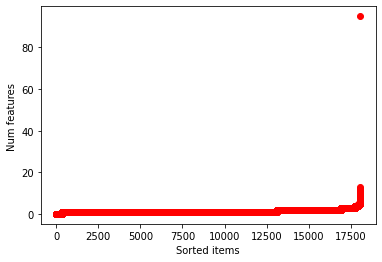

In [19]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(features_per_item, 'ro')
pyplot.ylabel('Num features ')
pyplot.xlabel('Sorted items')
pyplot.show()

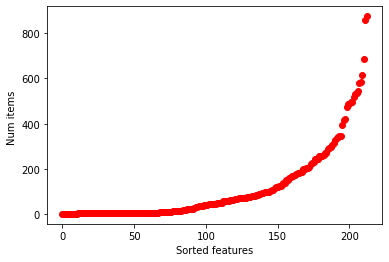

In [20]:
pyplot.plot(items_per_feature, 'ro')
pyplot.ylabel('Num items ')
pyplot.xlabel('Sorted features')
pyplot.show()

# We can now build the recommender algorithm, but first we need the train/test split and the evaluation function:

In [21]:
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

#URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
#evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 13644 ( 0.0%) Users that have less than 1 test interactions


In [22]:
#DA QUESTO PUNTO ROBE DI ANALISI DATASET vogliamo tenere?

## A KNN is built with the following steps:
* Compute the similarity of an item with all others
* Select the k-highest similarities

In [23]:
item_id = 80
shrink = 10

The numerator is the dot product of the item features times the whole ICM data transposed

In [24]:
numerator_vector = ICM_all[item_id].dot(ICM_all.T).toarray().ravel()
numerator_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
item_norms = np.sqrt(np.array(ICM_all.T.power(2).sum(axis=0))).ravel()
item_norms

array([1.        , 1.        , 1.41421356, ..., 1.        , 1.        ,
       1.        ])

The denominator will be the product of norms plus the srink term and a small value which prevents the denominator to be zero (only for non-negative data)

In [26]:
denominator_vector = item_norms[item_id] * item_norms + shrink + 1e-6
denominator_vector

array([11.000001  , 11.000001  , 11.41421456, ..., 11.000001  ,
       11.000001  , 11.000001  ])

In [27]:
similarity_vector = numerator_vector/denominator_vector

Let's sort the similarity from the highest to the lowest

In [28]:
sorted_item_indices = np.argsort(-similarity_vector)
sorted_item_indices

array([ 8664, 11307,  2176, ...,  6116,  6124, 18058])

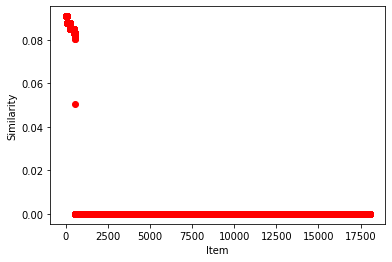

In [29]:
pyplot.plot(similarity_vector[sorted_item_indices], 'ro')
pyplot.ylabel('Similarity')
pyplot.xlabel('Item')
pyplot.show()

Now we select the k most similar items

In [30]:
k = 20

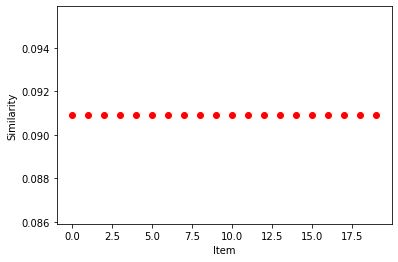

In [31]:
pyplot.plot(similarity_vector[sorted_item_indices[0:k]], 'ro')
pyplot.ylabel('Similarity')
pyplot.xlabel('Item')
pyplot.show()

The operation is performed for all items.
A simple strategy to perform it efficiently is to vectorize the most computationally intensive part, the dot product, on a group of items. The speedup can be of a factor of 10-100.
This strategy is limited by the fact that the result of the dot product is a huge item-item dense similarity which likely does not fit in memory.

In [32]:
import traceback

try:
    numerator_matrix = ICM_all.dot(ICM_all.T).toarray()
    
except Exception as e:
    traceback.print_exc()

The solution is:
* Compute the numerator a block of items at a time leveraging vectorization while not running out of memory
* Extract the k-nn on those items
* Built incrementally the sparse similarity matrix

In [33]:
block_size = 100

numerator_block = ICM_all[0:block_size].dot(ICM_all.T).toarray()
numerator_block.shape

(100, 18059)

Let's compare the speed to compute the dot product on the whole similarity of the two strategies

In [34]:
import time

n_items = ICM_all.shape[0]

start_time = time.time()

for n_item in range(n_items):
    numerator_vector = ICM_all[item_id].dot(ICM_all.T).toarray().ravel()
    
end_time = time.time()

print("Computing the similarity one item at a time runs at {:.2f} items/sec".format(n_items/(end_time-start_time)))



Computing the similarity one item at a time runs at 1444.28 items/sec


In [35]:
n_items = ICM_all.shape[0]

start_time = time.time()

block_size = 100
blocks_start_positions = range(0, n_items, block_size)

for start_pos in blocks_start_positions:
    end_pos = min(start_pos + block_size, n_items)
    
    numerator_block = ICM_all[start_pos:end_pos].dot(ICM_all.T).toarray()
    
end_time = time.time()

print("Computing the similarity in blocks of 100 items at a time runs at {:.2f} items/sec".format(n_items/(end_time-start_time)))



Computing the similarity in blocks of 100 items at a time runs at 17729.27 items/sec


### In this case the vectorized implementation runs >20 times faster!

#### Usually most of the speed gain comes with blocks of 100 or so items, depending on the system. Much higher than that tends to not be beneficial while requiring increasingly more memory.

In [ ]:
#DA QUA INIZIA PARTE CON MODEL + evaluation

#### Let's now compute the entire similarity matrix and use it to generate recommendations

In [37]:
from Recommenders.Similarity.Compute_Similarity_Python import Compute_Similarity_Python

similarity_object = Compute_Similarity_Python(ICM_all.T, shrink=0.0, 
                                          topK=100,
                                          normalize=True, 
                                          similarity = "cosine")

W_sparse = similarity_object.compute_similarity()
W_sparse

Similarity column 18059 (100.0%), 3105.54 column/sec. Elapsed time 5.82 sec


<18059x18059 sparse matrix of type '<class 'numpy.float32'>'
	with 1710358 stored elements in Compressed Sparse Row format>

In [38]:
user_id = 200
user_profile = URM_train[user_id]

scores = user_profile.dot(W_sparse)
scores

<1x18059 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In [39]:
scores = scores.toarray().ravel()
scores

array([0., 0., 0., ..., 0., 0., 0.])

We can then sort the scores to recommend the highest ranked ones

In [40]:
ranking = scores.argsort()[::-1][0:10]
ranking

array([ 1969, 14276, 16315,  4162,   513,  4998,  2119, 13702,  2836,
        8360])

In [41]:
scores[ranking]

array([0.99999905, 0.99999905, 0.99999905, 0.99999905, 0.99999905,
       0.99999905, 0.99999905, 0.99999905, 0.99999905, 0.99999905])

## Test our CBF recommender:

#### We put everything in a Python class with a standard interface

In [42]:
from Recommenders.Similarity.Compute_Similarity_Python import Compute_Similarity_Python

class ItemKNNCBFRecommender(object):
    
    def __init__(self, URM, ICM):
        self.URM = URM
        self.ICM = ICM
        
            
    def fit(self, topK=50, shrink=100, normalize = True, similarity = "cosine"):
        
        similarity_object = Compute_Similarity_Python(self.ICM.T, shrink=shrink, 
                                                  topK=topK, normalize=normalize, 
                                                  similarity = similarity)
        
        self.W_sparse = similarity_object.compute_similarity()

        
    def recommend(self, user_id, at=None, exclude_seen=True):
        # compute the scores using the dot product
        user_profile = self.URM[user_id]
        scores = user_profile.dot(self.W_sparse).toarray().ravel()

        if exclude_seen:
            scores = self.filter_seen(user_id, scores)

        # rank items
        ranking = scores.argsort()[::-1]
            
        return ranking[:at]
    
    
    def filter_seen(self, user_id, scores):

        start_pos = self.URM.indptr[user_id]
        end_pos = self.URM.indptr[user_id+1]

        user_profile = self.URM.indices[start_pos:end_pos]
        
        scores[user_profile] = -np.inf

        return scores

In [43]:
recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
recommender.fit(shrink=0.0, topK=100)

Similarity column 18059 (100.0%), 3113.12 column/sec. Elapsed time 5.80 sec


In [44]:
def precision(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    precision_score = np.sum(is_relevant, dtype=np.float32) / len(is_relevant)
    
    return precision_score
    
def recall(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    recall_score = np.sum(is_relevant, dtype=np.float32) / relevant_items.shape[0]
    
    return recall_score

def MAP(recommended_items, relevant_items):
   
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    # Cumulative sum: precision at 1, at 2, at 3 ...
    p_at_k = is_relevant * np.cumsum(is_relevant, dtype=np.float32) / (1 + np.arange(is_relevant.shape[0]))
    
    map_score = np.sum(p_at_k) / np.min([relevant_items.shape[0], is_relevant.shape[0]])

    return map_score

In [45]:
# We pass as paramether the recommender class

def evaluate_algorithm(URM_test, recommender_object, at=10):
    
    cumulative_precision = 0.0
    cumulative_recall = 0.0
    cumulative_MAP = 0.0
    
    num_eval = 0


    for user_id in range(URM_test.shape[0]):

        relevant_items = URM_test.indices[URM_test.indptr[user_id]:URM_test.indptr[user_id+1]]
        
        if len(relevant_items)>0:
            
            recommended_items = recommender_object.recommend(user_id, at=at)
            num_eval+=1

            cumulative_precision += precision(recommended_items, relevant_items)
            cumulative_recall += recall(recommended_items, relevant_items)
            cumulative_MAP += MAP(recommended_items, relevant_items)
            
    cumulative_precision /= num_eval
    cumulative_recall /= num_eval
    cumulative_MAP /= num_eval
    
    print("Recommender results are: Precision = {:.4f}, Recall = {:.4f}, MAP = {:.4f}".format(
        cumulative_precision, cumulative_recall, cumulative_MAP)) 

In [46]:
evaluate_algorithm(URM_validation, recommender)

Recommender results are: Precision = 0.0568, Recall = 0.0089, MAP = 0.0207


In [47]:
for user_id in range(10):
    print(recommender.recommend(user_id, at=5))

[14072 12984  6897  1577 17663]
[ 1386  1239  1325 16332  2555]
[3673 3721 3329 3637 3239]
[ 1215  1496 15629 13496 11282]
[5241 5938 3859 6364 8185]
[15344  7576  7638  5048  2426]
[ 7703 11161 12720 10886  3098]
[ 8495  3992 14727   176  2698]
[16181  3569 16221  3390  2547]
[ 1367   570 10254 10289  4236]


#### Let's talk about speed

#### Time to compute recommendations for a fixed group of users

### Let's add a common mistake.... a CSC URM

In [ ]:
#qui hyper param tuning non ancora usata

## Hyperparameter tuning

#### Once we have built our model we can play with its hyperparameters
* Number of neighbors
* Shrinkage
* Similarity type

#### Number of neighbors

In [ ]:
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

x_tick = [10, 50, 100, 200, 500]
MAP_per_k = []

for topK in x_tick:
    
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=0.0, topK=topK)
    
    result_df, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_df.loc[10]["MAP"])

ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 10681 (100.0%), 3852.52 column/sec. Elapsed time 2.77 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 52.88 sec. Users per second: 1320
ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 10681 (100.0%), 2391.72 column/sec. Elapsed time 4.47 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 1.15 min. Users per second: 1014
ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65

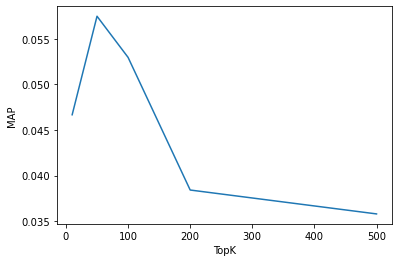

In [ ]:
pyplot.plot(x_tick, MAP_per_k)
pyplot.ylabel('MAP')
pyplot.xlabel('TopK')
pyplot.show()

#### On this dataset the number of neighbors has a limited impact on MAP. Fine-tuning around the best values is needed.

#### Different datasets will behave in different ways.

### Shrinkage

In [ ]:
x_tick = [0, 10, 50, 100, 200, 500]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=shrink, topK=100)
    
    result_df, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_df.loc[10]["MAP"])

ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 10681 (100.0%), 2267.18 column/sec. Elapsed time 4.71 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 1.17 min. Users per second: 992
ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 10681 (100.0%), 2343.31 column/sec. Elapsed time 4.56 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 1.27 min. Users per second: 915
ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 

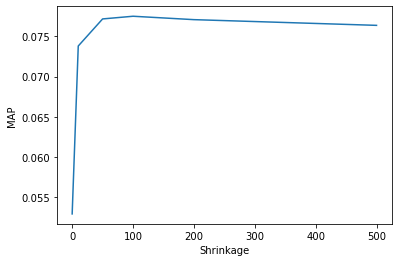

In [ ]:
pyplot.plot(x_tick, MAP_per_shrinkage)
pyplot.ylabel('MAP')
pyplot.xlabel('Shrinkage')
pyplot.show()

#### The shrinkage value (i.e. support) have a much stronger impact. Combine a parameter search with the two to ensure maximum recommendation quality

## Be careful, overfitting!

#### While a thorough parameter tuning might result in significantly higher MAP on your validation split, it could have only marginally better or even worse MAP on the test set

# Feature weighting

# IDF

![title](https://www.link-assistant.com/images/news/tf-idf-tool-for-seo/screen-03.png)

In [ ]:
num_tot_items = ICM_all.shape[0]

# let's count how many items have a certain feature
items_per_feature = np.ediff1d(sps.csc_matrix(ICM_all).indptr)

IDF = np.log(num_tot_items / items_per_feature)

print(ICM_all.shape)
print(IDF.shape)

(10681, 16529)
(16529,)


In [ ]:
np.sort(items_per_feature)

array([  1,   1,   1, ..., 404, 492, 640], dtype=int32)

In [ ]:
np.sort(IDF)

array([2.81475356, 3.07774302, 3.27480686, ..., 9.27622174, 9.27622174,
       9.27622174])

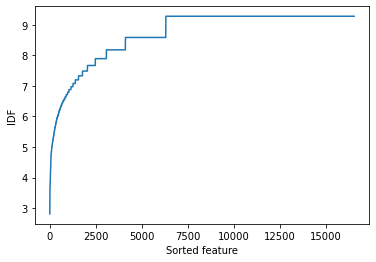

In [ ]:
pyplot.plot(np.sort(IDF))
pyplot.ylabel('IDF')
pyplot.xlabel('Sorted feature')
pyplot.show()

#### Highest ranked features

In [ ]:
feature_index_to_original_ID_dict = {value:key for key,value in feature_original_ID_to_index_dict.items()}

In [ ]:
sorted_features = np.argsort(-IDF)

highest_ranked_features = sorted_features[:20]

for feature_index in highest_ranked_features:
    print(feature_index_to_original_ID_dict[feature_index])

Tour de France
Parkour: Getting Around Obstacles A Great Complement To Being Alive
I Guess Nude Terminators Can't Kill A Really Bad Film
The Whole Tromeo & Juliet Threw Me Off But Thank Gawd They Didn't Talk Like Bill The Spear Shaker
What If The Big Bad Wolf & Grandma Were Swapping Spit?
An Orifice & A Gentle Hand Refried For '06
Read All The Negative Reviews & Save 2 Hours Of Your Life!
'Lemme Get This Straight. You Have No Idea Who You Are But You Wanna Be Famous?'
If I See One More Roast Beef Sandwich You Will Smell My Reaction
Obviously Hillary Had A Different Meaning For "Secret Service"
Ethan Hunt Should Stop Hogging The Screen!
'Priceline Negotiator!'
The Power Of The P
Believe In Your Ability To See Stoopid Plotlines
Not Even Uma Could Save This Dizaster! Wanda Yikes!
It's Not Size Of Your Stick But Why You Keep On Swingin' It!
'So How Did Lois Survive Date Nite?'
A Comedy Version Of Matchpoint
You Would Do Anything In The Universe To Get Rachael Weisz Back As Well
Or How The 

#### Lowest ranked features

In [ ]:
lowest_ranked_features = sorted_features[-20:]

for feature_index in lowest_ranked_features:
    print(feature_index_to_original_ID_dict[feature_index])    

atmospheric
library
seen more than once
Nudity (Topless - Brief)
To See
adapted from:book
imdb top 250
Can't remember
classic
Bibliothek
Betamax
National Film Registry
movie to see
Nudity (Topless)
based on a book
70mm
R
erlend's DVDs
less than 300 ratings
Tumey's DVDs


In [ ]:
from scipy.sparse import diags
diags(IDF)

<16529x16529 sparse matrix of type '<class 'numpy.float64'>'
	with 16529 stored elements (1 diagonals) in DIAgonal format>

In [ ]:
ICM_idf = ICM_all.copy()

ICM_idf = ICM_idf*diags(IDF)

In [ ]:
recommender_idf = ItemKNNCBFRecommender(URM_train, ICM_idf)
recommender_idf.fit(shrink=0.0, topK=50)

result_df, _ = evaluator_test.evaluateRecommender(recommender_idf)
result_df.loc[10]

ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Similarity column 10681 (100.0%), 12570.16 column/sec. Elapsed time 0.85 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 1.11 min. Users per second: 1046


PRECISION                     0.064612
PRECISION_RECALL_MIN_DEN      0.069536
RECALL                        0.031595
MAP                           0.033033
MAP_MIN_DEN                   0.035236
MRR                           0.182019
NDCG                           0.06165
F1                            0.042438
HIT_RATE                      0.361528
ARHR_ALL_HITS                 0.242267
NOVELTY                       0.012861
AVERAGE_POPULARITY            0.145178
DIVERSITY_MEAN_INTER_LIST     0.974787
DIVERSITY_HERFINDAHL          0.997477
COVERAGE_ITEM                 0.497051
COVERAGE_ITEM_CORRECT          0.12012
COVERAGE_USER                 0.975324
COVERAGE_USER_CORRECT         0.352607
DIVERSITY_GINI                0.085107
SHANNON_ENTROPY                9.97297
RATIO_DIVERSITY_HERFINDAHL    0.998231
RATIO_DIVERSITY_GINI          0.437404
RATIO_SHANNON_ENTROPY         0.880689
RATIO_AVERAGE_POPULARITY      0.517932
RATIO_NOVELTY                 0.135647
Name: 10, dtype: object

#### Try other feature weighting methods like BM25...

# BM25

In [ ]:
from Recommenders.IR_feature_weighting import okapi_BM_25

ICM_BM25 = ICM_all.copy().astype(np.float32)
ICM_BM25 = okapi_BM_25(ICM_BM25)
ICM_BM25 = ICM_BM25.tocsr()

In [ ]:
recommender_bm25 = ItemKNNCBFRecommender(URM_train, ICM_BM25)
recommender_bm25.fit(shrink=0.0, topK=50)

result_df, _ = evaluator_test.evaluateRecommender(recommender_bm25)
result_df.loc[10]

ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
Similarity column 10681 (100.0%), 7833.88 column/sec. Elapsed time 1.36 sec
EvaluatorHoldout: Processed 69801 (100.0%) in 1.11 min. Users per second: 1047


PRECISION                     0.068167
PRECISION_RECALL_MIN_DEN      0.073332
RECALL                        0.033192
MAP                           0.035112
MAP_MIN_DEN                   0.037427
MRR                           0.190268
NDCG                           0.06501
F1                            0.044645
HIT_RATE                      0.374851
ARHR_ALL_HITS                   0.2552
NOVELTY                       0.012731
AVERAGE_POPULARITY            0.156639
DIVERSITY_MEAN_INTER_LIST     0.973207
DIVERSITY_HERFINDAHL          0.997319
COVERAGE_ITEM                  0.49986
COVERAGE_ITEM_CORRECT         0.120682
COVERAGE_USER                 0.975324
COVERAGE_USER_CORRECT         0.365601
DIVERSITY_GINI                0.083708
SHANNON_ENTROPY               9.925844
RATIO_DIVERSITY_HERFINDAHL    0.998072
RATIO_DIVERSITY_GINI          0.430212
RATIO_SHANNON_ENTROPY         0.876528
RATIO_AVERAGE_POPULARITY      0.558818
RATIO_NOVELTY                 0.134279
Name: 10, dtype: object

#### A small gain over TF-IDF

# Unnormalized similarity matrix

In [ ]:
recommender_dot = ItemKNNCBFRecommender(URM_train, ICM_all)
recommender_dot.W_sparse = ICM_all * ICM_all.T

result_df, _ = evaluator_test.evaluateRecommender(recommender_dot)
result_df.loc[10]

ItemKNNCBFRecommender: URM Detected 1689 ( 2.4%) users with no interactions.
ItemKNNCBFRecommender: URM Detected 65 ( 0.6%) items with no interactions.
ItemKNNCBFRecommender: ICM Detected 3080 (28.8%) items with no features.
EvaluatorHoldout: Processed 69801 (100.0%) in 1.89 min. Users per second: 617


PRECISION                     0.123245
PRECISION_RECALL_MIN_DEN      0.133744
RECALL                         0.05978
MAP                            0.06813
MAP_MIN_DEN                    0.07305
MRR                           0.326255
NDCG                          0.129399
F1                            0.080509
HIT_RATE                      0.583459
ARHR_ALL_HITS                 0.461001
NOVELTY                       0.008514
AVERAGE_POPULARITY            0.582362
DIVERSITY_MEAN_INTER_LIST     0.599285
DIVERSITY_HERFINDAHL          0.959928
COVERAGE_ITEM                 0.047374
COVERAGE_ITEM_CORRECT         0.017508
COVERAGE_USER                 0.975324
COVERAGE_USER_CORRECT         0.569061
DIVERSITY_GINI                0.002435
SHANNON_ENTROPY               5.044842
RATIO_DIVERSITY_HERFINDAHL    0.960653
RATIO_DIVERSITY_GINI          0.012517
RATIO_SHANNON_ENTROPY         0.445498
RATIO_AVERAGE_POPULARITY      2.077612
RATIO_NOVELTY                 0.089805
Name: 10, dtype: object

In [ ]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

URM_all_dataframe = pd.read_csv(data_train_path,
                                dtype={0:int, 1:int, 2:int})
#URM_all_dataframe.columns = ["UserID", "ItemID", "Interaction"]

URM_all_dataframe.head(n=50)

#INIZIAMO PRENDENDO ICM GENRE

icm_file_name = data_path + "data_ICM_genre.csv"


ICM_all_dataframe = pd.read_csv(icm_file_name,
                                dtype={0:int, 1:int, 2:int})

#ICM_all_dataframe.columns = ["ItemID", "GenreID", "Interaction"]

In [ ]:
users = URM_all_dataframe.row
items = URM_all_dataframe.col
data = URM_all_dataframe.data
URM_all = sps.coo_matrix((data, (users, items)))
URM_all = URM_all.tocsr() #fast row access -> fast access to users 
URM_all.shape

(13650, 18059)

In [ ]:
items = ICM_all_dataframe.row
features = ICM_all_dataframe.col
data = ICM_all_dataframe.data
ICM_all = sps.coo_matrix((data, (items, features)))
ICM_all = ICM_all.tocsr() #fast row access -> fast access to users 
ICM_all.shape

(18059, 8)

In [ ]:
#sistemare lo split e usare evaluator del prof



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls


ls: cannot access 'gdrive': Transport endpoint is not connected
drive/  gdrive/  sample_data/


In [ ]:
%cd 

/root


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/recsys/mypythondirectory')

In [ ]:

#from RecSys_Course_AT_PoliMi.Evaluation.Evaluator import EvaluatorHoldout

ModuleNotFoundError: ignored

In [ ]:
!cp drive/MyDrive/Evaluator.py
import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

#splitting data into train and validation (from the previous training data)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)

ModuleNotFoundError: ignored

In [ ]:
#evaluator for validation (used for hyperparameter tuning)
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])

In [ ]:
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.ItemKNNSimilarityHybridRecommender import ItemKNNSimilarityHybridRecommender

recommender = ItemKNNCBFRecommender(URM_train, ICM_all)

In [ ]:
x_tick = []
collaborative_MAP = []

for topK in [100,200,300,500,600, 625, 650, 700]:
    for shrink in [50,100,150,190,200,250,300,400,500]:
        x_tick.append("topk {}, shrink{}".format(topK,shrink))


        recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
        recommender.fit(topK=topK, shrink=shrink, feature_weighting = 'TF-IDF')

        result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

        collaborative_MAP.append(result_dict[10]["MAP"])

In [ ]:
import operator
index, value = max(enumerate(collaborative_MAP), key=operator.itemgetter(1))
print(index, value)
parameters = x_tick[index]
print(parameters)

In [ ]:
test_users = pd.read_csv('data_target_users_test.csv')
test_users

In [ ]:
# best model itemCBF topk 600, shrink200, weightTF-IDF

recommender = ItemKNNCBFRecommender(URM_all, ICM_all)
recommender.fit(topK=600, shrink=200, feature_weighting = 'TF-IDF')

user_id = test_users['user_id']
recommendations = recommender.recommend(user_id,cutoff = 10)

In [ ]:
for index in range(len(recommendations)):
    #print(element)
    recommendations[index]=np.array(recommendations[index])
    #print(type(element))
print(len(recommendations))

In [ ]:
test_users['item_list']= recommendations
#test_users['item_list'] =  test_users['item_list'].apply(lambda x: x.replace('[','').replace(']','')) 
test_users['item_list'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in test_users['item_list']])

#convert the string columns to int
#test_users['item_list'] = test_users['item_list'].astype(int)
test_users
test_users.to_csv('submission.csv', index=False)